In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import time

In [2]:
data = pd.read_csv('elem+hard_feat_class.csv')
data

,Compound,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,mean_eta_anion,std-dev_eta_anion,min_diff_eta,max_diff_eta,mean_diff_eta,std-dev_diff_eta,mean_eta_both,geom-mean_eta_both,Thermo_Dyn_stability_level_,Thermo_Dyn_stability_level
0,OH-OH-Ba,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,56,55,...,5.6,0.0,7.2,7.2,7.2,0.0,8.000000,7.376698,Hm,1
1,OH-OH-Be,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,8,7,...,5.6,0.0,62.2,62.2,62.2,0.0,26.333333,12.858844,Mm,4
2,OH-OH-Ca,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,20,19,...,5.6,0.0,14.1,14.1,14.1,0.0,10.300000,8.516885,Hm,1
3,OH-OH-Cd,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,48,47,...,5.6,0.0,4.7,4.7,4.7,0.0,7.166667,6.861269,Hm,1
4,OH-OH-Co,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,27,26,...,5.6,0.0,2.6,2.6,2.6,0.0,6.466667,6.359114,Mh,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,Se-Te-Sn,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,52,18,...,4.6,1.8,11.9,15.5,13.7,1.8,9.166667,6.895986,Hh,0
3095,Se-Te-Tc,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,52,18,...,4.6,1.8,6.4,10.0,8.2,1.8,7.333333,6.121380,Hm,1
3096,Se-Te-Ti,3,0.57735,0.480750,0.415244,0.389977,0.372041,22,52,30,...,4.6,1.8,21.6,25.2,23.4,1.8,12.400000,7.946307,Hm,1
3097,Se-Te-W,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,74,40,...,4.6,1.8,-0.9,2.7,0.9,1.8,4.900000,4.619201,Mm,4


In [3]:
Y = data.iloc[:,-1]
Y_ = data.iloc[:,-2]
Y_

0       Hm
1       Mm
2       Hm
3       Hm
4       Mh
        ..
3094    Hh
3095    Hm
3096    Hm
3097    Mm
3098    Hm
Name: Thermo_Dyn_stability_level_, Length: 3099, dtype: object

In [4]:
X = data.iloc[:,-13:-2]
X

,eta_cation,min_eta_anion,max_eta_anion,mean_eta_anion,std-dev_eta_anion,min_diff_eta,max_diff_eta,mean_diff_eta,std-dev_diff_eta,mean_eta_both,geom-mean_eta_both
0,12.8,5.6,5.6,5.6,0.0,7.2,7.2,7.2,0.0,8.000000,7.376698
1,67.8,5.6,5.6,5.6,0.0,62.2,62.2,62.2,0.0,26.333333,12.858844
2,19.7,5.6,5.6,5.6,0.0,14.1,14.1,14.1,0.0,10.300000,8.516885
3,10.3,5.6,5.6,5.6,0.0,4.7,4.7,4.7,0.0,7.166667,6.861269
4,8.2,5.6,5.6,5.6,0.0,2.6,2.6,2.6,0.0,6.466667,6.359114
...,...,...,...,...,...,...,...,...,...,...,...
3094,18.3,2.8,6.4,4.6,1.8,11.9,15.5,13.7,1.8,9.166667,6.895986
3095,12.8,2.8,6.4,4.6,1.8,6.4,10.0,8.2,1.8,7.333333,6.121380
3096,28.0,2.8,6.4,4.6,1.8,21.6,25.2,23.4,1.8,12.400000,7.946307
3097,5.5,2.8,6.4,4.6,1.8,-0.9,2.7,0.9,1.8,4.900000,4.619201


In [5]:
df_hh = data.loc[data['Thermo_Dyn_stability_level_'] == 'Hh']
df_hh

,Compound,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,mean_eta_anion,std-dev_eta_anion,min_diff_eta,max_diff_eta,mean_diff_eta,std-dev_diff_eta,mean_eta_both,geom-mean_eta_both,Thermo_Dyn_stability_level_,Thermo_Dyn_stability_level
13,OH-OH-Sr,3,0.600000,0.514256,0.460906,0.441882,0.428730,1,38,37,...,5.60,0.00,10.7,10.7,10.70,0.00,9.166667,7.995664,Hh,0
22,OH-O-Gd,3,0.612372,0.538609,0.506099,0.501109,0.500098,1,64,63,...,5.25,0.35,6.1,6.8,6.45,0.35,7.400000,6.847363,Hh,0
39,O-O-Pd,2,0.745356,0.693361,0.670782,0.667408,0.666732,8,46,38,...,4.90,0.00,3.7,3.7,3.70,0.00,6.133333,5.910581,Hh,0
40,O-O-Pt,2,0.745356,0.693361,0.670782,0.667408,0.666732,8,78,70,...,4.90,0.00,3.8,3.8,3.80,0.00,6.166667,5.933402,Hh,0
98,S-OH-Rh,4,0.500000,0.396850,0.329877,0.304753,0.287175,1,45,44,...,4.45,1.15,5.6,7.9,6.75,1.15,6.700000,5.915253,Hh,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,S-Te-Ti,3,0.577350,0.480750,0.415244,0.389977,0.372041,16,52,36,...,4.85,1.55,21.6,24.7,23.15,1.55,12.566667,8.393646,Hh,0
3083,S-Te-Zr,3,0.577350,0.480750,0.415244,0.389977,0.372041,16,52,36,...,4.85,1.55,16.6,19.7,18.15,1.55,10.900000,7.860930,Hh,0
3090,Se-Te-Pd,3,0.577350,0.480750,0.415244,0.389977,0.372041,34,52,18,...,4.60,1.80,2.2,5.8,4.00,1.80,5.933333,5.361408,Hh,0
3091,Se-Te-Pt,3,0.577350,0.480750,0.415244,0.389977,0.372041,34,78,44,...,4.60,1.80,2.3,5.9,4.10,1.80,5.966667,5.382108,Hh,0


In [6]:
x_hh = df_hh.iloc[:,-13:-2]
x_hh

,eta_cation,min_eta_anion,max_eta_anion,mean_eta_anion,std-dev_eta_anion,min_diff_eta,max_diff_eta,mean_diff_eta,std-dev_diff_eta,mean_eta_both,geom-mean_eta_both
13,16.3,5.6,5.6,5.60,0.00,10.7,10.7,10.70,0.00,9.166667,7.995664
22,11.7,4.9,5.6,5.25,0.35,6.1,6.8,6.45,0.35,7.400000,6.847363
39,8.6,4.9,4.9,4.90,0.00,3.7,3.7,3.70,0.00,6.133333,5.910581
40,8.7,4.9,4.9,4.90,0.00,3.8,3.8,3.80,0.00,6.166667,5.933402
98,11.2,3.3,5.6,4.45,1.15,5.6,7.9,6.75,1.15,6.700000,5.915253
...,...,...,...,...,...,...,...,...,...,...,...
3081,28.0,3.3,6.4,4.85,1.55,21.6,24.7,23.15,1.55,12.566667,8.393646
3083,23.0,3.3,6.4,4.85,1.55,16.6,19.7,18.15,1.55,10.900000,7.860930
3090,8.6,2.8,6.4,4.60,1.80,2.2,5.8,4.00,1.80,5.933333,5.361408
3091,8.7,2.8,6.4,4.60,1.80,2.3,5.9,4.10,1.80,5.966667,5.382108


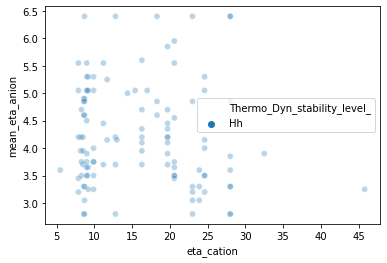

In [7]:
sns.scatterplot(
   x="eta_cation", y="mean_eta_anion",
   hue="Thermo_Dyn_stability_level_",
#    palette=sns.color_palette("hls", 9),
   data=df_hh,
   legend="full",
   alpha=0.3
)
# plt.savefig('try-1_1.eps')

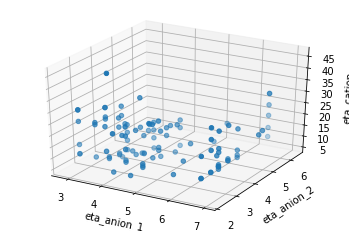

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df_hh['max_eta_anion']
y = df_hh['min_eta_anion']
z = df_hh['eta_cation']

ax.set_xlabel("eta_anion_1")
ax.set_ylabel("eta_anion_2")
ax.set_zlabel("eta_cation")

ax.scatter(x, y, z)

plt.show()

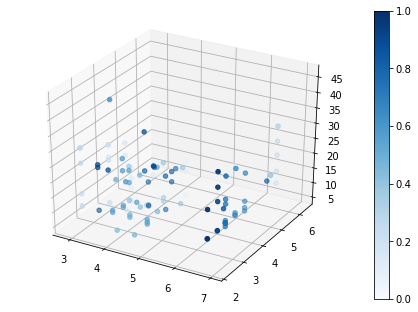

array([0.        , 0.00884956, 0.01769912, 0.02654867, 0.03539823,
       0.04424779, 0.05309735, 0.0619469 , 0.07079646, 0.07964602,
       0.08849558, 0.09734513, 0.10619469, 0.11504425, 0.12389381,
       0.13274336, 0.14159292, 0.15044248, 0.15929204, 0.16814159,
       0.17699115, 0.18584071, 0.19469027, 0.20353982, 0.21238938,
       0.22123894, 0.2300885 , 0.23893805, 0.24778761, 0.25663717,
       0.26548673, 0.27433628, 0.28318584, 0.2920354 , 0.30088496,
       0.30973451, 0.31858407, 0.32743363, 0.33628319, 0.34513274,
       0.3539823 , 0.36283186, 0.37168142, 0.38053097, 0.38938053,
       0.39823009, 0.40707965, 0.4159292 , 0.42477876, 0.43362832,
       0.44247788, 0.45132743, 0.46017699, 0.46902655, 0.47787611,
       0.48672566, 0.49557522, 0.50442478, 0.51327434, 0.52212389,
       0.53097345, 0.53982301, 0.54867257, 0.55752212, 0.56637168,
       0.57522124, 0.5840708 , 0.59292035, 0.60176991, 0.61061947,
       0.61946903, 0.62831858, 0.63716814, 0.6460177 , 0.65486

In [79]:
import matplotlib.cm as cmx
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
def scatter3d(x,y,z, cs, colorsMap='Blues'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()
    
cs = np.linspace(0,1,114)
scatter3d(x,y,z,cs)
cs

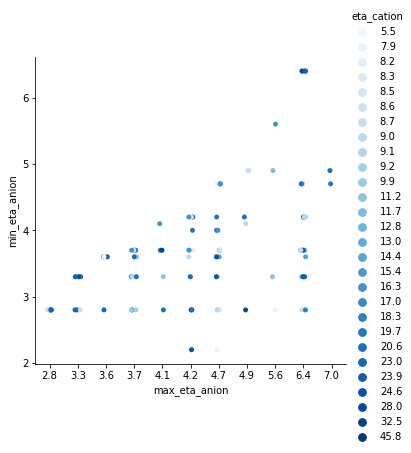

In [81]:
sns.catplot(x="max_eta_anion", y="min_eta_anion", hue="eta_cation", data=df_hh, palette="Blues")

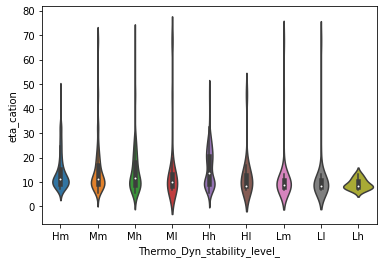

In [13]:
sns.violinplot(y="eta_cation", x="Thermo_Dyn_stability_level_", data=data)

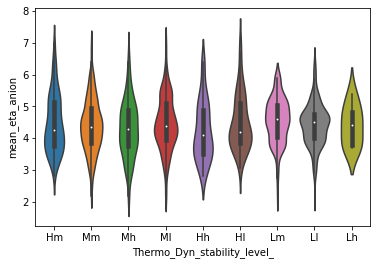

In [14]:
sns.violinplot(y="mean_eta_anion", x="Thermo_Dyn_stability_level_", data=data)

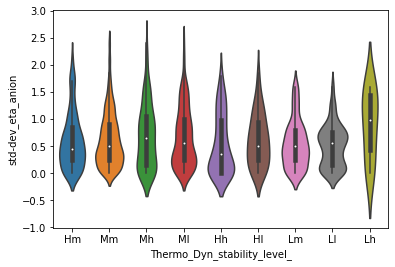

In [19]:
sns.violinplot(y="std-dev_eta_anion", x="Thermo_Dyn_stability_level_", data=data)

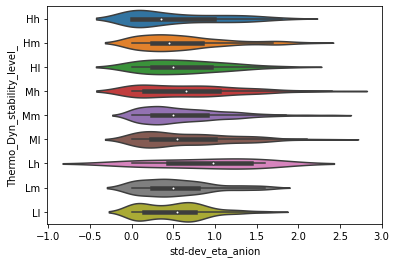

In [65]:
## looks important -- check carefully
sns.violinplot(x="std-dev_eta_anion", y="Thermo_Dyn_stability_level_", data=data, 
               order=["Hh", "Hm", "Hl", "Mh", "Mm", "Ml", "Lh", "Lm", "Ll"])

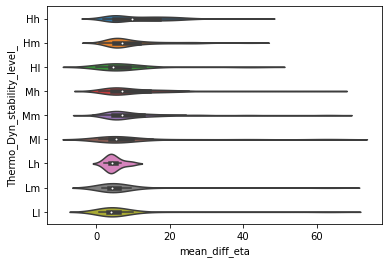

In [66]:
sns.violinplot(x="mean_diff_eta", y="Thermo_Dyn_stability_level_", data=data, 
               order=["Hh", "Hm", "Hl", "Mh", "Mm", "Ml", "Lh", "Lm", "Ll"])

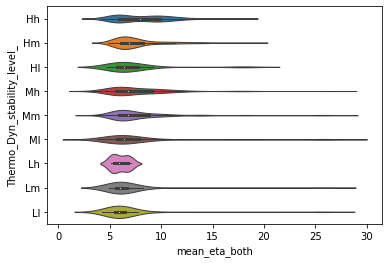

In [68]:
sns.violinplot(x="mean_eta_both", y="Thermo_Dyn_stability_level_", data=data, 
               order=["Hh", "Hm", "Hl", "Mh", "Mm", "Ml", "Lh", "Lm", "Ll"], linewidth=1.0)

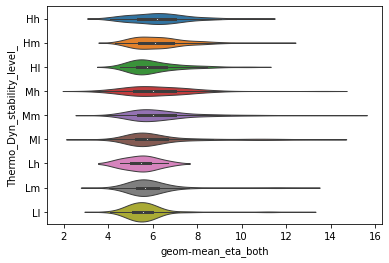

In [69]:
sns.violinplot(x="geom-mean_eta_both", y="Thermo_Dyn_stability_level_", data=data, 
               order=["Hh", "Hm", "Hl", "Mh", "Mm", "Ml", "Lh", "Lm", "Ll"], linewidth=1.0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


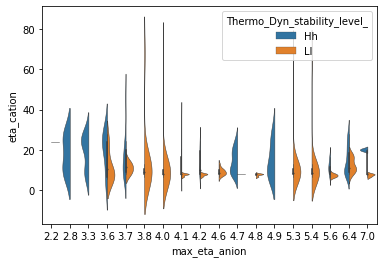

In [60]:
ax = sns.violinplot(x="max_eta_anion", y="eta_cation", hue="Thermo_Dyn_stability_level_", split="True",
                    data=data.query("Thermo_Dyn_stability_level == 0 or Thermo_Dyn_stability_level == 8"), linewidth=0.5)
plt.savefig('check_1.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


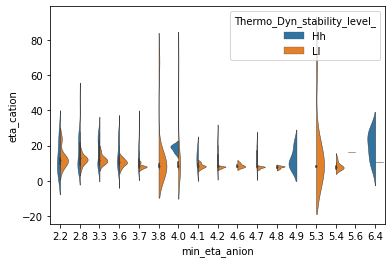

In [61]:
ax = sns.violinplot(x="min_eta_anion", y="eta_cation", hue="Thermo_Dyn_stability_level_", split="True",
                    data=data.query("Thermo_Dyn_stability_level == 0 or Thermo_Dyn_stability_level == 8"), linewidth=0.5)
plt.savefig('check_2.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


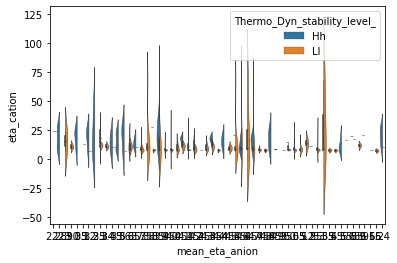

In [59]:
ax = sns.violinplot(x="mean_eta_anion", y="eta_cation", hue="Thermo_Dyn_stability_level_", split="True",
                    data=data.query("Thermo_Dyn_stability_level == 0 or Thermo_Dyn_stability_level == 8"),linewidth=0.5)
plt.savefig('check_3.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


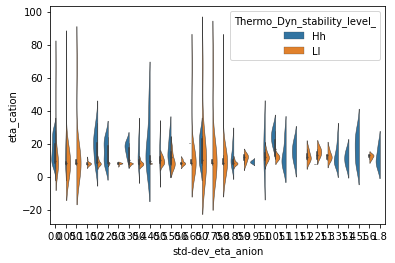

In [58]:
ax = sns.violinplot(x="std-dev_eta_anion", y="eta_cation", hue="Thermo_Dyn_stability_level_", split="True", scale="count",
                    data=data.query("Thermo_Dyn_stability_level == 0 or Thermo_Dyn_stability_level == 8"), linewidth=0.5)
plt.savefig('check_4.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


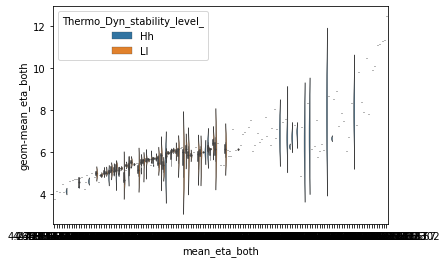

In [64]:
ax = sns.violinplot(x="mean_eta_both", y="geom-mean_eta_both", hue="Thermo_Dyn_stability_level_", split="True", scale="count",
                    data=data.query("Thermo_Dyn_stability_level == 0 or Thermo_Dyn_stability_level == 8"), linewidth=0.5)
plt.savefig('check_5.eps')

In [42]:
data.loc[data["Thermo_Dyn_stability_level_"] == "Ll"]

,Compound,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,mean_eta_anion,std-dev_eta_anion,min_diff_eta,max_diff_eta,mean_diff_eta,std-dev_diff_eta,mean_eta_both,geom-mean_eta_both,Thermo_Dyn_stability_level_,Thermo_Dyn_stability_level
174,CN-CN-Cu,3,0.600000,0.514256,0.460906,0.441882,0.428730,6,29,23,...,5.30,0.00,3.0,3.0,3.00,0.00,6.300000,6.154743,Ll,8
178,CN-CN-Ni,3,0.600000,0.514256,0.460906,0.441882,0.428730,6,28,22,...,5.30,0.00,3.2,3.2,3.20,0.00,6.366667,6.203787,Ll,8
180,CN-CN-Pd,3,0.600000,0.514256,0.460906,0.441882,0.428730,6,46,40,...,5.30,0.00,1.5,1.5,1.50,0.00,5.800000,5.759086,Ll,8
181,CN-CN-Pt,3,0.600000,0.514256,0.460906,0.441882,0.428730,6,78,72,...,5.30,0.00,2.7,2.7,2.70,0.00,6.200000,6.079678,Ll,8
223,NC-NC-Ni,3,0.600000,0.514256,0.460906,0.441882,0.428730,6,28,22,...,5.40,0.00,3.1,3.1,3.10,0.00,6.433333,6.281579,Ll,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,SH-SCN-Pt,5,0.471405,0.381571,0.341279,0.334802,0.333463,1,78,77,...,3.95,0.15,3.9,4.2,4.05,0.15,5.300000,4.995195,Ll,8
2881,NH-PH-Ge,4,0.529150,0.444796,0.407234,0.401326,0.400117,1,32,31,...,2.90,0.70,20.3,21.7,21.00,0.70,9.900000,5.741707,Ll,8
2885,NH-PH-Os,4,0.529150,0.444796,0.407234,0.401326,0.400117,1,76,75,...,2.90,0.70,3.2,4.6,3.90,0.70,4.200000,3.776400,Ll,8
2908,NH-S-Te,4,0.500000,0.396850,0.329877,0.304753,0.287175,1,52,51,...,3.45,0.15,7.1,7.4,7.25,0.15,5.866667,5.028056,Ll,8


In [41]:
data.query("Thermo_Dyn_stability_level == 0 or Thermo_Dyn_stability_level == 8")

,Compound,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,mean_eta_anion,std-dev_eta_anion,min_diff_eta,max_diff_eta,mean_diff_eta,std-dev_diff_eta,mean_eta_both,geom-mean_eta_both,Thermo_Dyn_stability_level_,Thermo_Dyn_stability_level
13,OH-OH-Sr,3,0.600000,0.514256,0.460906,0.441882,0.428730,1,38,37,...,5.60,0.00,10.7,10.7,10.70,0.00,9.166667,7.995664,Hh,0
22,OH-O-Gd,3,0.612372,0.538609,0.506099,0.501109,0.500098,1,64,63,...,5.25,0.35,6.1,6.8,6.45,0.35,7.400000,6.847363,Hh,0
39,O-O-Pd,2,0.745356,0.693361,0.670782,0.667408,0.666732,8,46,38,...,4.90,0.00,3.7,3.7,3.70,0.00,6.133333,5.910581,Hh,0
40,O-O-Pt,2,0.745356,0.693361,0.670782,0.667408,0.666732,8,78,70,...,4.90,0.00,3.8,3.8,3.80,0.00,6.166667,5.933402,Hh,0
98,S-OH-Rh,4,0.500000,0.396850,0.329877,0.304753,0.287175,1,45,44,...,4.45,1.15,5.6,7.9,6.75,1.15,6.700000,5.915253,Hh,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,S-Te-Ti,3,0.577350,0.480750,0.415244,0.389977,0.372041,16,52,36,...,4.85,1.55,21.6,24.7,23.15,1.55,12.566667,8.393646,Hh,0
3083,S-Te-Zr,3,0.577350,0.480750,0.415244,0.389977,0.372041,16,52,36,...,4.85,1.55,16.6,19.7,18.15,1.55,10.900000,7.860930,Hh,0
3090,Se-Te-Pd,3,0.577350,0.480750,0.415244,0.389977,0.372041,34,52,18,...,4.60,1.80,2.2,5.8,4.00,1.80,5.933333,5.361408,Hh,0
3091,Se-Te-Pt,3,0.577350,0.480750,0.415244,0.389977,0.372041,34,78,44,...,4.60,1.80,2.3,5.9,4.10,1.80,5.966667,5.382108,Hh,0


In [43]:
192+114

306